
#        NEURAL NETWORKS AND DEEP LEARNING FOR FINANCE     
##                          
                                        Winter 2022
                                 Stocks data forecast#
 
Project :                                             
##  Use Deep Learning Techniques to model stocks data                                                



The following Paython code is modelling of stock data with deep learning.Task is to find optimum articture for deep learning model,




##Students name 	  Student No.	      
Shubham Meshram: ETU20212295




 




##  Download history data from yahoo finance

Please select the symbol of stock from this list

* Group.   Symbol | Company 
1.   PFE | Pfizer
2.   AMZN | Amazon.com
1.   NFLX | Netflix Inc
1.   DAL | Delta Air Line
1.   BA | Boeing Co
2.   C | Citigroup Inc 
1.   BNTX | BioNTech SE - ADR
2.   ZM | Zoom Video Communications Inc
1.   MRNA | Moderna therapeutics 
3.  BTC-USD |  Bitcoin USD

In [ ]:
# The first the step is to download history data from yahoo finance.
# Install yahoo finance package 

In [ ]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 10.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np 
import pandas as pd
import plotly.graph_objs as go

import statsmodels as sm
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler

import re
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor 
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras.models import Sequential
from keras.layers import LSTM

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Select Symbol from the list according to your group. 
#https://bit.ly/2IK70kN

MyTicker = yf.Ticker("CNC")

In [ ]:
# if there is a problem for downloading data for symbol fron the above list, you can select the symbol of stock from the follwing list

# Group. Symbol | Company
# PFE | Pfizer
# AMZN | Amazon.com
# NFLX | Netflix Inc
# DAL | Delta Air Line
# BA | Boeing Co
# C | Citigroup Inc
# BNTX | BioNTech SE - ADR
# ZM | Zoom Video Communications Inc
# MRNA | Moderna therapeutics
# BTC-USD | Bitcoin USD

In [ ]:
# Question 1: Write about stock, you can get stock information from yahoo
print(MyTicker.info)
# Centene is committed to helping people live healthier lives. 
# They provide access to high-quality healthcare, innovative programs.
# And wide range of health solutions that help families and individuals get well, stay well and be well.
# all-time high Centene stock closing price was 85.95 on February 09, 2022.
## More options: https://github.com/ranaroussi/yfinance

{'zip': '63105', 'sector': 'Healthcare', 'fullTimeEmployees': 72500, 'longBusinessSummary': "Centene Corporation operates as a multi-national healthcare enterprise that provides programs and services to under-insured and uninsured individuals in the United States. Its Managed Care segment offers health plan coverage to individuals through government subsidized programs, including Medicaid, the State children's health insurance program, long-term services and support, foster care, and medicare-medicaid plans, which cover dually eligible individuals, as well as aged, blind, or disabled programs. Its health plans include primary and specialty physician care, inpatient and outpatient hospital care, emergency and urgent care, prenatal care, laboratory and X-ray, home-based primary care, transportation assistance, vision care, dental care, telehealth, immunization, specialty pharmacy, therapy, social work, nurse advisory, and care coordination services, as well as prescriptions and limited o

In [ ]:
# get historical market data from yahoo finance
data_s = MyTicker.history(period="max")
data_s['Date'] = data_s.index

In [ ]:
# Question 2: check data and provide statistical description of stock price, Explain?
import pandas as pd
pd.set_option('display.max_columns', 500) # To be able to see all the columns of the describe method
print(data_s.describe())
data_s.head(5)

              Open         High          Low        Close        Volume  \
count  5086.000000  5086.000000  5086.000000  5086.000000  5.086000e+03   
mean     22.635469    22.956166    22.307200    22.645050  2.879299e+06   
std      23.066449    23.370894    22.754503    23.074959  3.081128e+06   
min       1.189167     1.425000     1.189167     1.391667  0.000000e+00   
25%       5.188125     5.295000     5.054375     5.163125  1.445300e+06   
50%       9.086250     9.225000     8.937500     9.081250  2.240200e+06   
75%      35.905000    36.250000    35.518750    35.888749  3.386300e+06   
max      86.400002    86.809998    85.669998    85.949997  8.039960e+07   

       Dividends  Stock Splits  
count     5086.0   5086.000000  
mean         0.0      0.001475  
std          0.0      0.052917  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0      2.000000  


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2001-12-13,1.189167,1.475000,1.189167,1.433333,56373600,0,0.0,2001-12-13
2001-12-14,1.434167,1.440833,1.370833,1.391667,11307600,0,0.0,2001-12-14
2001-12-17,1.391667,1.425000,1.383333,1.415000,1756800,0,0.0,2001-12-17
2001-12-18,1.408333,1.447500,1.391667,1.438333,3585600,0,0.0,2001-12-18
2001-12-19,1.437500,1.775000,1.433333,1.725833,3352800,0,0.0,2001-12-19


## Analysis of time series of Stock Price

In [ ]:
# Extracting Date, Open, High, Low and Close from the Dataframe.
data = data_s[['Date','Close','Open', 'High', 'Low','Volume']]

In [ ]:
# Plot time series the close price and volume of stock price 
# Question 3: Explain the time series plots and try to identify important events
  
fig=go.Figure(data=[go.Scatter(name = 'Close',x= data['Date'],y= data['Close'])])
fig.update_layout(title="Closing stock's price of centene 2001-2022",xaxis_title="Date", yaxis_title="Price (in $)")
fig.show()

fig=go.Figure(data=[go.Scatter(name = 'Volume',x= data['Date'],y= data['Volume'])])
fig.update_layout(title="Volume of centene's stock 2001-2022",xaxis_title="Date", yaxis_title="Volume")
fig.show()


In [ ]:
data = data_s[['Date','Close']]
print(data.head(2))
print(data.tail(2))

                 Date     Close
Date                           
2001-12-13 2001-12-13  1.433333
2001-12-14 2001-12-14  1.391667
                 Date      Close
Date                            
2022-02-24 2022-02-24  80.839996
2022-02-25 2022-02-25  83.519997


### Test of stationarity

In [ ]:
## Test of stationarity
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
### Question 4: Explain the assuption of Augmented Dickey-Fuller test and ADF test statistic test
#ADF test is based on the three models
# Model 1 without  constant and trend
# Model 2 with constant
# Model 3 with constant and trend
# in ADF test null hypotheis unit root is non stationary and Alternative hypothesis unit root is stationary.
# If t staticstics greater than ADF critical value null hypothesis is accepted 
# and if t staticstics less than  equal to ADF critical value


In [ ]:
### Question 5: What is unit root?
# Unit root are used to test if a time series is stationary or not.

In [ ]:
### Question 6: Check the stationary property of stock price and explain your finding
#Answer: t statictics is less than ADF critical value thus it is non significant and centene's data at first level is stationary
adf_test(data_s['Close'])


Augmented Dickey-Fuller Test: 
ADF test statistic         1.084046
p-value                    0.995078
# lags used               33.000000
# observations          5052.000000
critical value (1%)       -3.431645
critical value (5%)       -2.862112
critical value (10%)      -2.567075
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
# Question 7: Calculate the first difference of stock price and Check the stationary property of the data
##Answer: t statictics is greater than ADF critical value thus it is significant and centene's data at first diffrence is stationary
from statsmodels.tsa.statespace.tools import diff
change= diff(data_s['Close'],k_diff=1)
adf_test(change)


Augmented Dickey-Fuller Test: 
ADF test statistic     -1.402137e+01
p-value                 3.566376e-26
# lags used             3.200000e+01
# observations          5.052000e+03
critical value (1%)    -3.431645e+00
critical value (5%)    -2.862112e+00
critical value (10%)   -2.567075e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
#Question 8: Plot time series the first difference of stock price and explain your finding
#Answer: At first difference the data is stationary and mean,variance,covaricance is constant over time.
fig=go.Figure(data=[go.Scatter(name = 'Close',x= data['Date'],y= change)])
fig.update_layout(title="First difference closing stock's price of centene 2001-2022",xaxis_title="Date", yaxis_title="Price (in $)")
fig.show()



In [ ]:
# Check the stationary property of the first difference of stock price
adf_test(change)

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.402137e+01
p-value                 3.566376e-26
# lags used             3.200000e+01
# observations          5.052000e+03
critical value (1%)    -3.431645e+00
critical value (5%)    -2.862112e+00
critical value (10%)   -2.567075e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
# You can select some part of your data
dfs = data.loc[data['Date'] >'2015']
dfs.head(1)

,Date,Close,Open,High,Low,Volume
Date,,,,,,
2015-01-02,2015-01-02,26.110001,26.58,26.745001,25.940001,1620400


In [ ]:
dfs.tail(1)

,Date,Close,Open,High,Low,Volume
Date,,,,,,
2022-02-25,2022-02-25,83.519997,80.370003,83.650002,80.220001,2055400


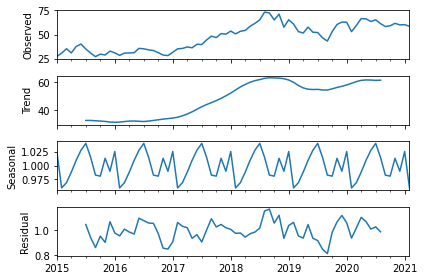

In [ ]:
# Decompose the stock price to its components:
# Stock price= Trend+Seasonal+Error
series_close=dfs['Close']
series_close.index=pd.to_datetime(series_close.index)
# Correct the starting and final dates of stock price (dfs.head(1) and dfs.tail(1))
idx=pd.date_range('2015-01-02','2021-03-05',freq='M')
series_close=series_close.reindex(idx,method='pad')
series_close=series_close.astype('float32')
series_close.shape
decomposed = seasonal_decompose(series_close,model='multiplicative')
fig = decomposed.plot()

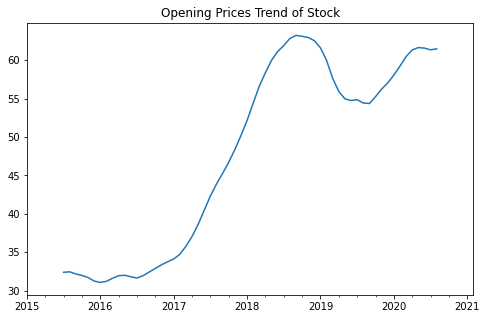

In [ ]:
#Question 9:  Plot Trend component of stock data and explain the your findings
#Answer there is global up trend after 2017 to 2018 (more than 30$ to more than 60$ ) and sudden fall till the end of 2019
# and growth from End of 2019 to 2022 in between (55 to 60 $) in opening prices
decomposed.trend.plot(figsize=(8,5),title='Opening Prices Trend of Stock')



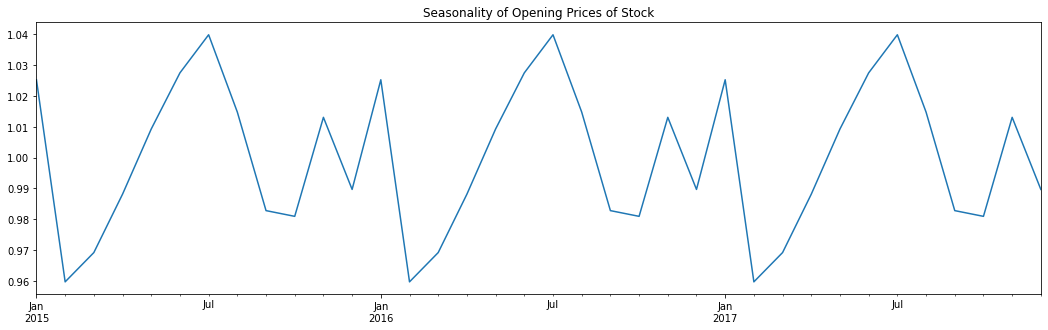

In [ ]:
# Question 10: Plot Seasonality component of stock data and explain the your findings
#Answer: according to the graph the opening stock prices in the month of july and Jan.
#But the increase in stock price is more seen in the month of july rather than jan.

decomposed.seasonal[:36].plot(figsize=(18,5),title='Seasonality of Opening Prices of Stock');



Extracing High, Low, Close from the previous dataframe and load to other and discarding date.

In [ ]:
#Extracing Close from the dataframe and discarding date.
df = dfs.iloc[:,1:]
df.head(5)

,Close,Open,High,Low,Volume
Date,,,,,
2015-01-02,26.110001,26.580000,26.745001,25.940001,1620400
2015-01-05,26.040001,25.927500,26.457500,25.862499,2036800
2015-01-06,26.125000,26.477501,26.895000,25.947500,4416800
2015-01-07,26.267500,26.465000,26.687500,26.212500,2348800
2015-01-08,26.672501,26.450001,26.790001,26.362499,3831200


## LSTM Model 

### Splitting the dataframe to make training dataset

In [ ]:
# For the LSTM Model Splitting the dataframe to make training dataset.
# Use 80% of data as training data
training_set = df.iloc[:round(len(df)*0.8)].values

In [ ]:
# Scale data to the range (0,1)
#Question 11: Why we should scale data? How the MinMaxScaler function works?

scaler = MinMaxScaler(feature_range=(0, 1))
training_set = scaler.fit_transform(training_set)

 

In [ ]:
# Here, we are going to make such arrangement with the training dataset that previous 120 Days will be used to predict the next 10 days.

trainX = [] 
trainY = []

in_future = 10 # Number of days we want to predict into the future 
in_past = 120 # Number of past days we want to use to predict the future

for i in range(in_past, len(training_set) - in_future +1): 
    trainX.append(training_set[i - in_past:i, 0:training_set.shape[1]]) 
    trainY.append(training_set[i + in_future - 1:i + in_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape = {}.'.format(trainX.shape)) 
print('trainY shape = {}.'.format(trainY.shape))

### Preparing Keras Model.

In [ ]:
model = Sequential()
#model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[0], trainX.shape[2]), return_sequences=True))
model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(100, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

#Question 13: Explain the structure of above deel plearning model.

### Fitting the Model to the training dataset

In [ ]:
# train model on full train set, with 80/20 CV split
history = model.fit(trainX, trainY, epochs=30, batch_size=32, validation_split=0.2, verbose=1)


### Ploting the accuracy and valid accuracy so as to observe the learning of the Model.

In [ ]:
Mean_loss = np.mean(history.history['loss'])
print("\n%s: %.2f%%" % ('Mean_loss', Mean_loss*100))
Mean_val_loss= np.mean(history.history['val_loss'])
print("\n%s: %.2f%%" % ('Mean_val_loss', Mean_val_loss*100))

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

#Question 14: Explain the accuracy plots for training and validation sets



It seems that the model is learning quite well. 
And the overfitting is not present in our model.

### Create test dataset and Prediction

In [ ]:
test_data =df.iloc[round(len(df)*0.8):,:].values
scaler = MinMaxScaler(feature_range=(0, 1))
test_data = scaler.fit_transform(test_data)

prediction_stocks = []

for i in range(120, len(test_data)):
    prediction_stocks.append(test_data[i-120:i])
    
prediction_stocks = np.array(prediction_stocks)
#Now we are going to feed in the prediction dataset to the model.
predictions = model.predict(prediction_stocks)

In [ ]:
prediction_stocks.shape

In [ ]:
# The predicted data need's to be invert transformed so that the values returns into the original scale.
y_pred_future = scaler.inverse_transform(predictions)
#Taking these predicted data and making it into dataframe so that it can be interpret.
df_forecast = pd.DataFrame({'Date':dfs.Date[-y_pred_future.shape[0]:],'Close':y_pred_future[:,0]})
df_forecast.head(3)

In [ ]:
# Ploting the predicted 'Close' Stock Price with Original 'Close' Stock Price.
# 
import plotly.graph_objs as go

fig2=go.Figure(data=[go.Scatter(name = 'Close',x= dfs['Date'],y= dfs['Close']),
                   go.Scatter(name = 'Close_Predicted',x= df_forecast['Date'],y= df_forecast['Close'])])
fig2.show()

In [ ]:
# #Question 15:  Calculate the residual and plot time series of residuals and explain your findings 
dfs_2 = data.loc[data['Date'] >'2020-05-05']
residual = dfs_2['Close'] - df_forecast['Close']
residual_df = pd.DataFrame(residual)

fig_resi=go.Figure(data=[go.Scatter(name = 'Close',x= dfs_2['Date'],y= residual_df['Close'])])
fig_resi.show()

# Cross-validation
Keras allows us to make use of cross-validation for training our model. So we will use this to train and assess our first model.

### Create Deep learning model
For this task, You must keep the model architecture pretty simple. 
The following function allows to parameterise the choice of hyperparameters in the deep learning. It will come in super handy when we move onto tuning our parameters later.

In [ ]:
def create_model(optimizer='adam', dropout=0.1,act='relu',dense_layer_sizes=[1], init='uniform', nbr_features=trainX.shape[0], dense_nparams=3):
    model = Sequential()
    model.add(LSTM(dense_nparams, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(dense_nparams, activation='relu', return_sequences=False))
    model.add(Dropout(dropout))

    for i in range(1,len(dense_layer_sizes)):
        model.add(Dense(dense_layer_sizes[i], activation=act))
        model.add(Dropout(dropout) )

    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer,metrics=["accuracy"])
    return model

In [ ]:
##Question 15:  Explain briefly create_model function, (why we need this function?, inputs, output, how it works?)

### Train model
At this stage, we have our model. We have chosen a few hyperparameters such as the number of hidden layers, the number of neurons and the activation function.

The next step is to train the model on our training set. This step also requires us to choose a few more hyperparameters such as the loss function, the optimization algorithm, the number of epochs and the batch size.

##  Grid search
###  batch size and epochs
We can see from the graph above that we might be training our network for too long. Let's use **grid search** to find out what the optimal values for `batch_size` and `epochs` are.

 **Please note, you will obtian the best structure for each specification of the model, you should use the best parameter for the nest step**

In [ ]:
##Question 16:  Explain briefly the batch_size and epochs and why we should find optimum value of them?



In [ ]:
# create model
model = KerasRegressor(build_fn=create_model, verbose=1)
#def create_model(optimizer='adam', dropout=0.1,act='relu',dense_layer_sizes=1, init='uniform', nbr_features=trainX.shape[0], dense_nparams=[3]):

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,  verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(trainX, trainY)


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

  # what is the batch size and epochs, you need to use them in the next steps.

### Optimization Algorithm

In [ ]:
##Question 17:Explain briefly the Optimization Algorithm and why we should try several Optimization Algorithms?


In [ ]:
# create model 
### In the following model please specify the optimum values of epochs and batch_size
# hint: 100 is default value of epochs and must be updated from pervious step
model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=64, verbose=1)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(optimizer=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(trainX, trainY)


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

  # what is the best optimizer, you need to use it in the next steps.

### Dropout

In [ ]:
###Question 16: why we should use Dropout?

###Question 17: Explain how 'Dropout' works ?

In [ ]:
# create model
## Find the optimum value of dropout
### In the following model please specify the optimum values of epochs, batch_size and optimizer

model = KerasRegressor(build_fn=create_model, 
                        epochs=50, batch_size=64, verbose=1,optimizer='SGD')

# define the grid search parameters 
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dropout=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(trainX, trainY)


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## The best dropout level is 0.05.

### Hidden neurons

In [ ]:
###Question 18: Explain how we can determine the opimum number of hidden layers?


In [ ]:
# create model
## Check this step, try to find optimum number of hidden layers (if it is possible)
model = KerasRegressor(build_fn=create_model, 
                        epochs=50, batch_size=64, verbose=1,optimizer='SGD')

# define the grid search parameters
layers = [(10,), (20,),(30,)]
param_grid = dict(dense_layer_sizes=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(trainX, trainY)



In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


# Output Final Predictions

In [ ]:
###Question 19: According to your grid search, construct the deep learning with the best parameter values 

# This is  a sample model, you need to modify this model
model = Sequential()
#model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[0], trainX.shape[2]), return_sequences=True))
model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[0], trainX.shape[2]), return_sequences=True))
model.add(LSTM(100, activation='relu', return_sequences=False))
model.add(Dropout(0.05))
model.add(Dense(100, activation='relu')) # Layer 1

model.add(Dense(100, activation='relu')) # Layer 10
model.add(Dropout(0.05))
model.add(Dense(1))
model.compile(optimizer='SGD', loss='mse', metrics=['accuracy'])
model.summary()



In [ ]:
# train model on full train set, with 80/20 CV split
history = model.fit(trainX, trainY, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

In [ ]:
Mean_loss = np.mean(history.history['loss'])
print("\n%s: %.2f%%" % ('Mean_loss', Mean_loss*100))
Mean_val_loss= np.mean(history.history['val_loss'])
print("\n%s: %.2f%%" % ('Mean_val_loss', Mean_val_loss*100))

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

In [ ]:
# Unfortunately, the model with optimized parameters (5.6%) performs worst than the original model (mean loss 0.47%). This could be explain by the consecutive grid search
# method where we assume that the order of the steps does not influence the result, as an example, we first find the number of epochs and then the optimizer but a better combinaison of epochs / optimizer 
# could exist if we include both parameters in one grid. However, this would be too ressource intensive to run.
# The more likely explanation is that we made a mistake somewhere that we were not able to find out.

## Calculation of prediction interval(90% confidence level)

** For 90% confidence level, t-multiplier is 1.645 which is calculated from degree of freedom of the sample.


t-multiplier(1.645) * standard deviation(stdev) gives the magnitude of interval.

The minimum and maximum range is given by :
confidence min = value-interval
confidence max = value + interval

In [ ]:
sum_err = np.sum((dfs.Close[-y_pred_future.shape[0]:]-df_forecast['Close'])**2)

print(sum_err)

x = (1/(len(df_forecast))*sum_err)

stdev = np.sqrt(x)

interval = 	1.645*stdev

print(interval)

** Adding the Close Confidence Min and Close Confidence Max to the dataframe, Plus the original closing price data too.

In [ ]:
df_forecast['Close Confidence Min'] = df_forecast['Close'] - interval

df_forecast['Close Confidence Max'] = df_forecast['Close'] + interval

df_forecast['Orginal Close'] = dfs.Close[-y_pred_future.shape[0]:]

df_forecast

** Ploting the Closing Price(Original and Predicted) with the Close Confidence Min as 'Lower Bound' and Close Confidence Max as 'Upper Bound' which gives the idea of the Model's 90% Confidence Level.

In [ ]:

     
fig3=go.Figure(data=[
                        go.Scatter(
                                    name = 'Close',
                                    x= df_forecast['Date'],
                                    y= df_forecast['Orginal Close']),
                     
                        go.Scatter(
                                    name = 'Close Predicted',
                                    x= df_forecast['Date'],
                                    y= df_forecast['Close']),

                        go.Scatter(
                                    name='Upper Bound',
                                    x= df_forecast['Date'],
                                    y= df_forecast['Close Confidence Max'],
                                    mode='lines',
                                    marker=dict(color="green"),
                                    line=dict(width=1),
                                    showlegend=False),

                         go.Scatter(
                                    name='Lower Bound',
                                    x= df_forecast['Date'],
                                    y= df_forecast['Close Confidence Min'],
                                    marker=dict(color="purple"),
                                    line=dict(width=1),
                                    mode='lines',
                                    fillcolor='rgba(68, 68, 68, 0.3)',
                                    fill='tonexty',
                                    showlegend=False)

                    ])

fig3.show()

###Question 20:  Calculation of prediction interval for your preduction and explain the time series plots
